In [1]:
# Python imports
import os, os.path as osp, glob
import numpy as np, pandas as pd
from datasets.stanford_campus_dataset import StanfordCampusDataset

# OpenCV
import cv2

# Matplotlib
from matplotlib import cm as cm, pyplot as plt, colors as mplotcolors
%load_ext autoreload
%autoreload 2

StanfordCampusDataset
Scenes - Videos
---------------
bookstore   - video0 video1 video2 video3 video4 video5 video6

coupa       - video0 video1 video2 video3

deathCircle - video0 video1 video2 video3 video4

gates       - video0 video1 video2 video3 video4 video5 video6 video7 video8

hyang       - video0 video1 video10 video11 video12 video13 video14 video2 video3 video4 video5 video6 video7 video8 video9

little      - video0 video1 video2 video3

nexus       - video0 video1 video10 video11 video2 video3 video4 video5 video6 video7 video8 video9

quad        - video0 video1 video2 video3


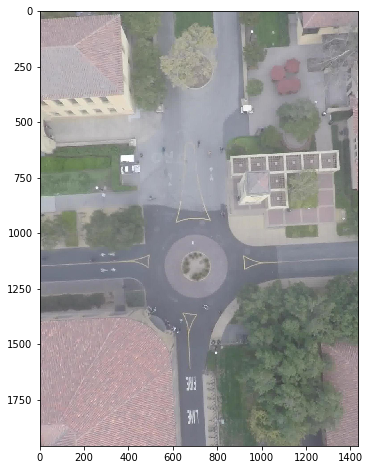

In [2]:
dataset = StanfordCampusDataset("../datasets/huge/stanford_campus_dataset")
print("{}\n\
Scenes - Videos\n\
---------------\n\
{}".format(
    dataset.name(), 
    "\n\n".join(["{:11s} - {}".format(k," ".join(v)) for k,v in dataset.get_scene_video_map().items()])))

scene, video = "deathCircle", "video2"
base_img = dataset.get_base_image_path(scene, video)

img = cv2.imread(base_img)[:,:,::-1]
img_resized = cv2.resize(img, (img.shape[0]//4, img.shape[0]//4))
plt.figure(figsize=(14,8))
plt.imshow(img)

In [3]:
df = dataset.get_annotations_df(scene, video)
df

,track_id,xmin,ymin,xmax,ymax,frame,lost,occluded,generated,label,ycenter,xcenter
0,0,789,399,815,436,0,0,0,0,Cart,417,802
1,0,787,391,815,432,1,0,0,1,Cart,411,801
2,0,787,387,817,428,2,0,0,1,Cart,407,802
3,0,787,383,817,428,3,0,0,1,Cart,405,802
4,0,787,375,819,424,4,0,0,1,Cart,399,803
...,...,...,...,...,...,...,...,...,...,...,...,...
15080,34,719,632,775,689,426,0,0,1,Biker,660,747
15081,34,721,632,777,689,427,0,0,1,Biker,660,749
15082,34,723,628,779,685,428,0,0,1,Biker,656,751
15083,34,725,628,781,685,429,0,0,1,Biker,656,753


In [4]:
# 6 - loop
traj_list = dataset.get_track_list(scene, video, [0,1,2,34,5,6,7,8,9])

Note: image clipped to: (1920, 1360, 3)


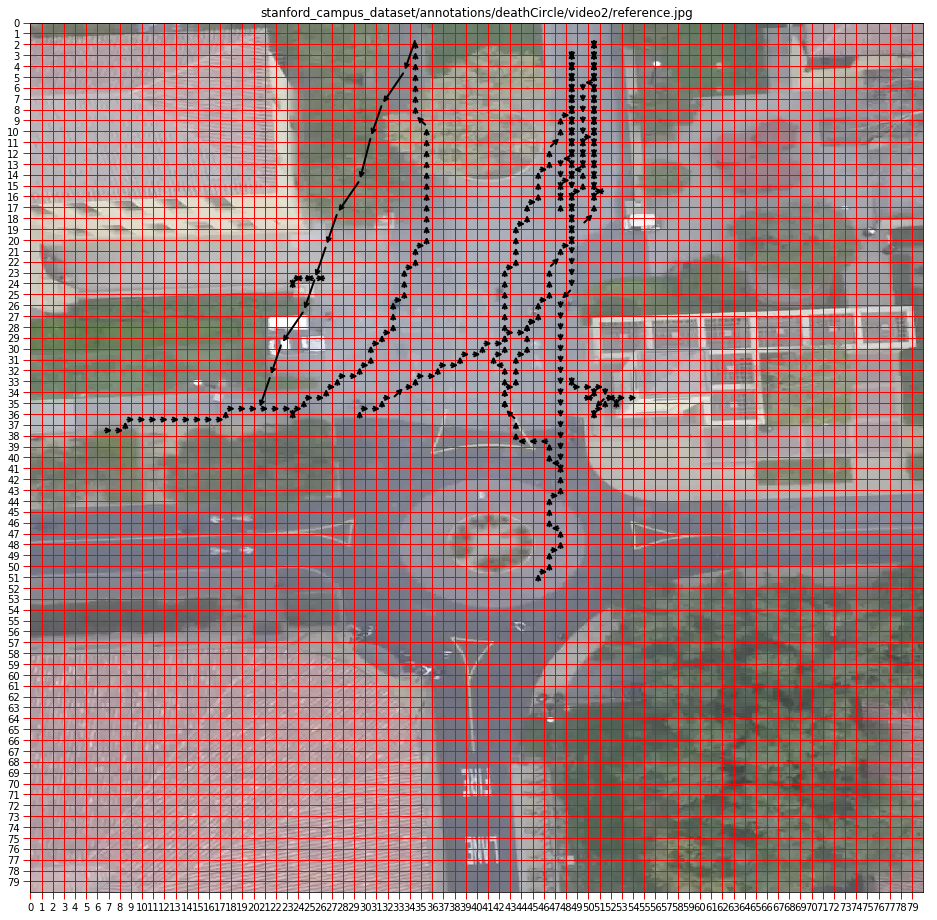

In [5]:
# Navigation MDP
import navigation_mdp as NvMDP
from navigation_mdp.plotting import *
from navigation_vis.Raster import Raster as NavGridView

img_dtizer = NvMDP.features.ImageDiscretizer(img, 80, 80, (0,0))
new_traj_list = img_dtizer.transform_trajectories(traj_list)

plt.figure(figsize=(16,16))
NavGridView(img_dtizer() / 255.).render().ticks(minor=False).grid().add_trajectories(new_traj_list,
    arrow_props={"lw": 2, "color": "black", "shrinkB":2, "shrinkA":2}).title(
    "/".join(base_img.split("/")[3:]))

# NavGridView(img_dtizer() / 255.).render().ticks(minor=False).grid().add_pixel_trajectories(traj_list,
#     arrow_props={"lw": 2, "color": "black", "shrinkB":2, "shrinkA":2}).title(
#     "/".join(base_img.split("/")[3:]))

In [5]:
dataset.show_video(scene, video, select_track_ids=[0,1,2,3,4,5,6,7,8,9], fps=30)

In [5]:
scene, video = "deathCircle", "video2"
for video in dataset.get_videos(scene):
    print(video)
    dataset.create_video(scene, video, store_file="{}.avi".format(video), 
                         select_track_ids="all", frame_start=0, frame_end=None)

video0
Finished writing video at video0.avi
video1
Finished writing video at video1.avi
video2
Finished writing video at video2.avi
video3
Finished writing video at video3.avi
video4
Finished writing video at video4.avi
